<a href="https://colab.research.google.com/github/ajaykumar080286/MachineLearning/blob/main/Assumption_of_Linear_Regresssion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns


**Linear Relationship**

In [3]:
df=pd.read_csv("data (1).csv")

In [4]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [9]:
X=df.iloc[:,0:3].values
y=df.iloc[:,-1].values

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
residual = y_test - y_pred

Text(0.5, 0, 'Feature 3')

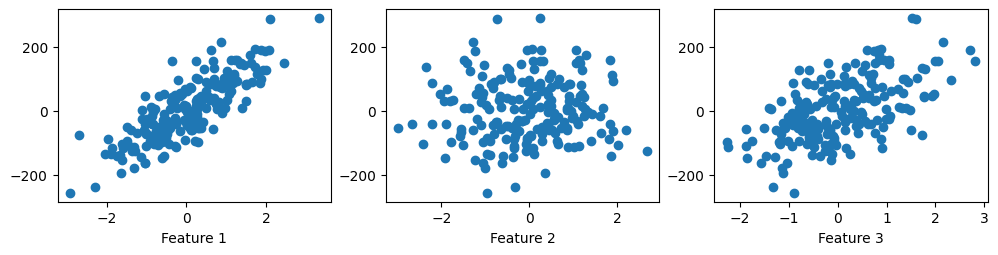

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))
ax1.scatter(df['feature1'], df['target'])
ax1.set_xlabel('Feature 1')

ax2.scatter(df['feature2'], df['target'])
ax2.set_xlabel('Feature 2')

ax3.scatter(df['feature3'], df['target'])
ax3.set_xlabel('Feature 3')

**2. Multicollinearity**

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
vif = []

for i in range(X_train.shape[1]):
  vif.append(variance_inflation_factor(X_train,i))

In [26]:
vif

[np.float64(1.0071786177364226),
 np.float64(1.0167248725888556),
 np.float64(1.0195463747763855)]

In [29]:
pd.DataFrame({'vif':vif},index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.007179,1.016725,1.019546


<Axes: >

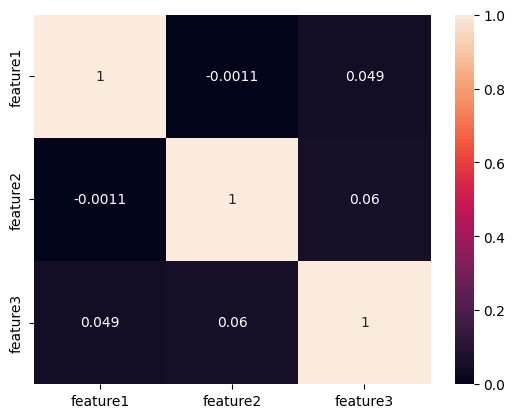

In [30]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

**3. Normality of Residual**

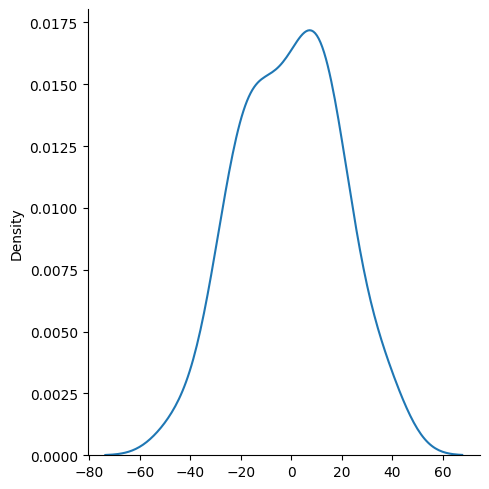

In [31]:
sns.displot(residual, kind='kde')

In [32]:
import scipy as sp

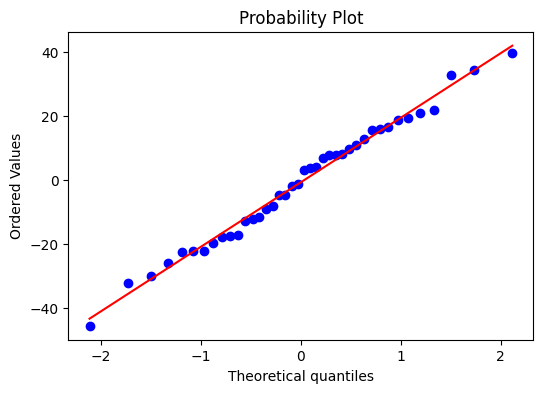

In [33]:
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

**4. Homoscedasticity**

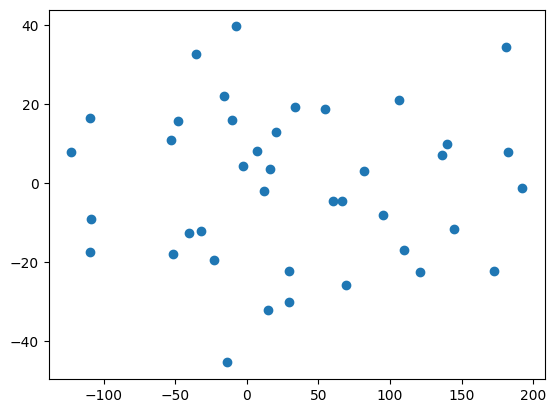

In [34]:
plt.scatter(y_pred,residual)

**5. Autocorrelation of Residuals**

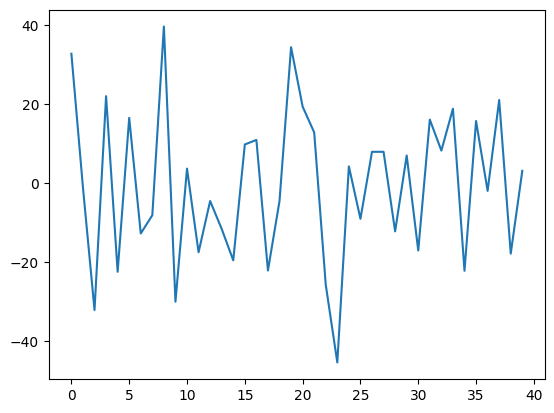

In [35]:
plt.plot(residual)